#Regresja liniowa

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

# dane wejsciowe
X = 2 * np.random.rand(100,1) # generujemy losowe wartośći z rokładu jednostkowego z przedziały [0,1]
y = 4 * X + 2 + np.random.randn(100,1) # dodajemy szum do danych

model = LinearRegression() # tworzymy model
model.fit(X,y) # dopasowujemy model do danych

print(f"Coef: {model.coef_[0] [0]:.2f}, Intercept: {model.intercept_[0]:.2f}")

# model.coef_[0] [0] - wspolczynnik regresji liniowej
# model.intercept_[0] - wyrax wolny b
#
# y = ax + b
# 
# a - w jaki kierunku zmienia sie y gdy zmienia sie x
# b - punkt przeciecia z osia y

Coef: 4.06, Intercept: 2.08


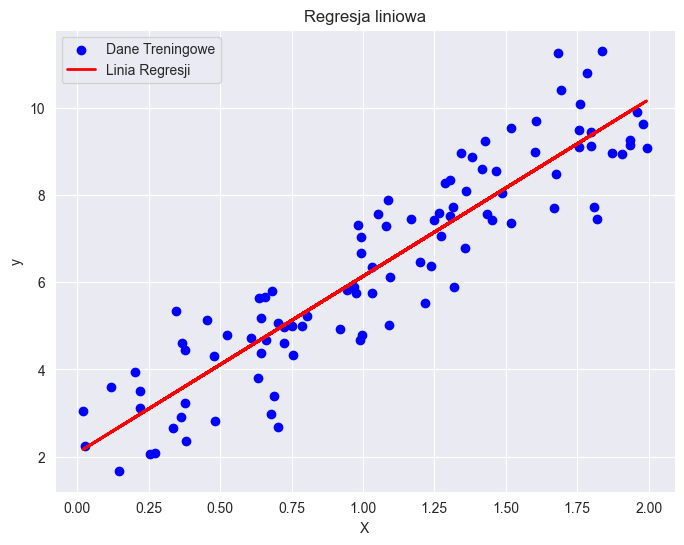

In [2]:
y_pred = model.predict(X) # przewidujemy wartości Y

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X,y, color="blue", label="Dane Treningowe")
plt.plot(X,y_pred, color="red", linewidth=2, label="Linia Regresji")
plt.title("Regresja liniowa")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

Badanie wplywy outlinerow

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

MSE (sredni blad kwawdratowy) bez outlinerow: 0.9727973491374426
MSE (sredni blad kwawdratowy) z outlinerami: 7.903254022134398
Model bez outlinerow: y = 3.82x + 2.25
Model bez outlinerami: y = 4.59x + 1.86


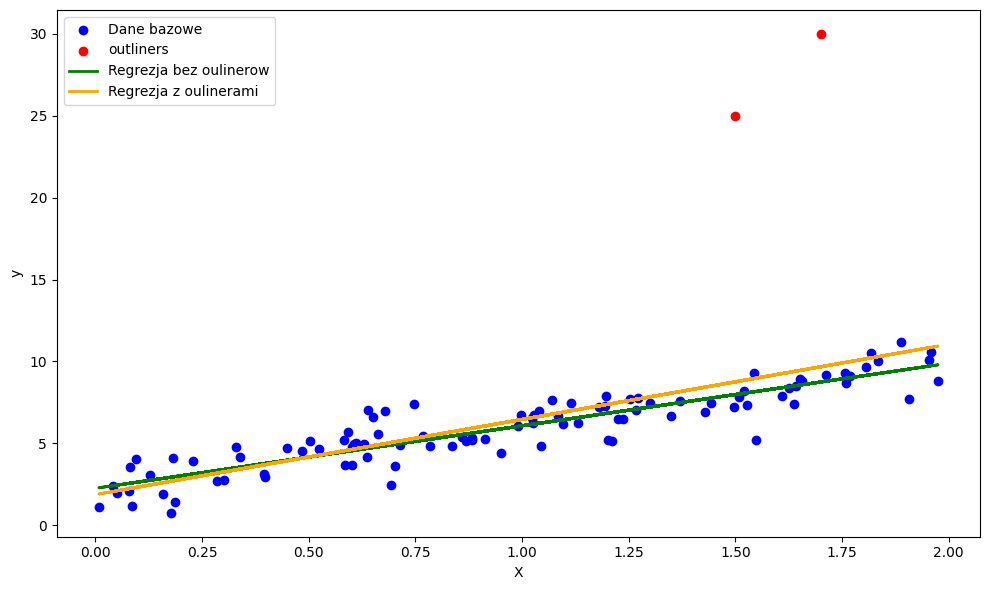

In [26]:
# dane wejsciowe
np.random.seed(10) # zdefiniowane ziarna losowosci

X = 2 * np.random.rand(100,1) # generujemy losowe wartośći z rokładu jednostkowego z przedziały [0,1]
y = 4 * X + 2 + np.random.randn(100,1) # dodajemy szum do danych

# regresja na danych klasycznych, bez outlinerow
model_normal = LinearRegression().fit(X,y)
y_pred_normal = model_normal.predict(X)

#dodawanie outlinerow
X_out = np.vstack([X, [1.5] ,[1.7]])
y_out = np.vstack([y, [25], [30]])

# model regresji z outlinerami
model_outliers = LinearRegression().fit(X_out,y_out)
y_pred_outliers = model_outliers.predict(X_out)

print("MSE (sredni blad kwawdratowy) bez outlinerow:", mean_squared_error(y, y_pred_normal))
print("MSE (sredni blad kwawdratowy) z outlinerami:", mean_squared_error(y_out, y_pred_outliers))

print("Model bez outlinerow: y = {:.2f}x + {:.2f}".format(model_normal.coef_[0] [0], model_normal.intercept_[0]))
print("Model bez outlinerami: y = {:.2f}x + {:.2f}".format(model_outliers.coef_[0] [0], model_outliers.intercept_[0]))

# wyswietlanie na wykresie
plt.figure(figsize=[10,6])
plt.scatter(X,y,color="blue", label="Dane bazowe")
plt.scatter([1.5,1.7],[25,30], color="red", label="outliners", zorder=5)
plt.plot(X,y_pred_normal, color="green", linewidth=2, label="Regrezja bez oulinerow")
plt.plot(X_out,y_pred_outliers, color="orange", linewidth=2, label="Regrezja z oulinerami")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.grid()

Badanie wplywu szumu na regresje

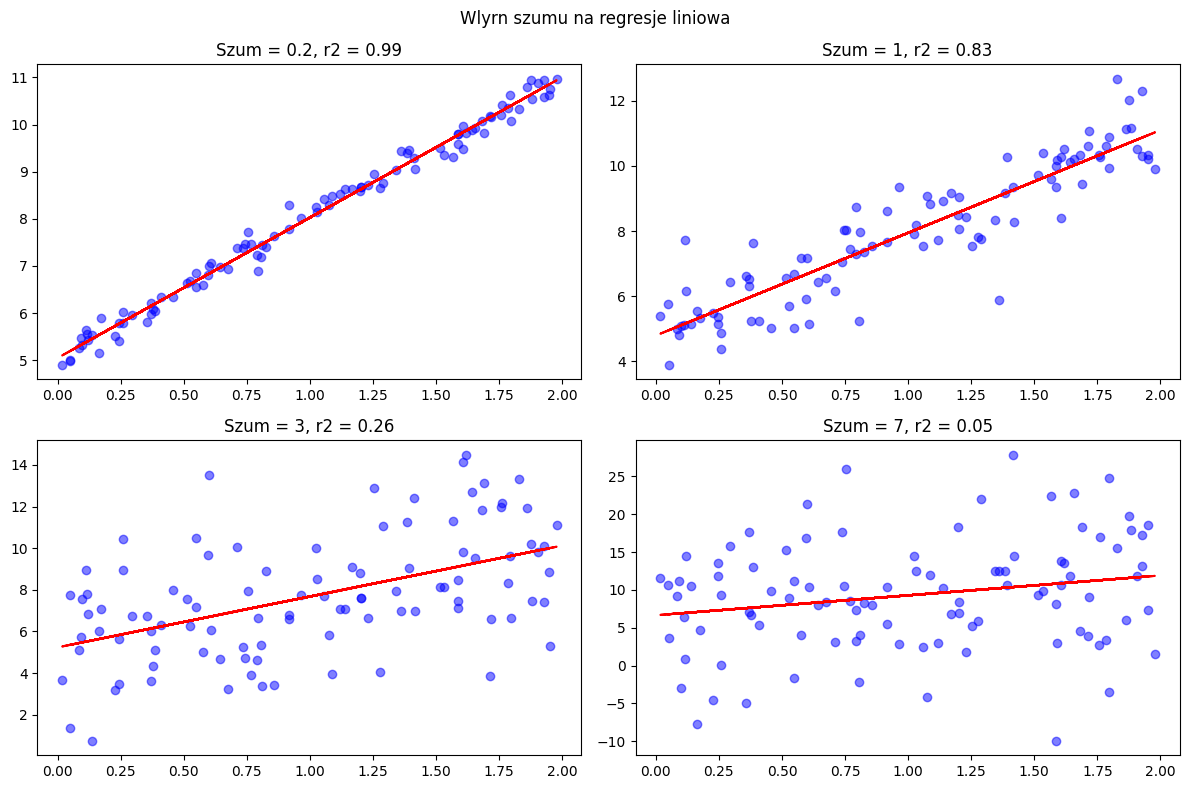

In [27]:
from sklearn.metrics import r2_score

X = 2 * np.random.rand(100,1)
poziom_szumu = [0.2, 1, 3 ,7]

plt.figure(figsize=(12,8))

for i, szum in enumerate(poziom_szumu,1):
  y = 3 * X + 5 + np.random.normal(0,szum, size = X.shape)
  model = LinearRegression().fit(X,y)
  y_pred = model.predict(X)
  r2 = r2_score(y, y_pred)

  plt.subplot(2,2,i)
  plt.scatter(X,y, color="blue", alpha = 0.5)
  plt.plot(X,y_pred, color="red")
  plt.title(f"Szum = {szum}, r2 = {r2:.2f}")

plt.suptitle("Wlyrn szumu na regresje liniowa")
plt.tight_layout()
plt.show()


Badanie wpływu liczby probek na regresje lniowa

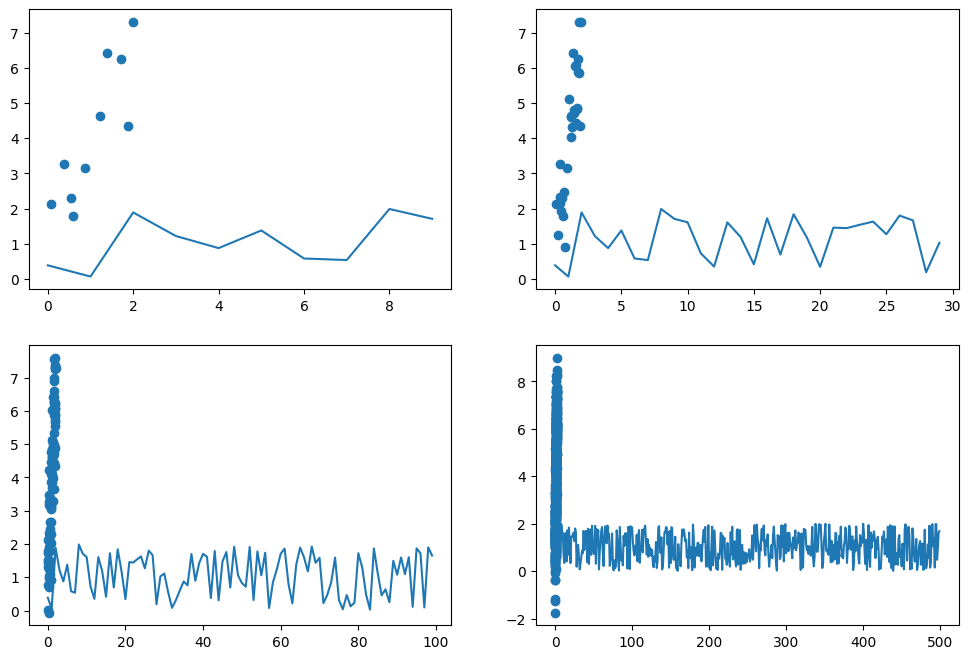

In [32]:
X = 2 * np.random.rand(500,1)
y = 3 * X + 1 + np.random.randn(500,1)

# generujemy 500 wierszy , 1 kolumne = kazdy to losowa liczba ze standardowego rozkladu normalnego (0,1)

liczba_probek = [10, 30, 100, 500]
r2_wynik = []

plt.figure(figsize=(12,8))

for i, proba in enumerate(liczba_probek, 1):
  X_przyklad = X[:proba]
  y_przyklad = y[:proba]
  model = LinearRegression().fit(X_przyklad, y_przyklad)
  y_pred = model.predict(X_przyklad)
  r2 = r2_score(y_przyklad, y_pred)
  r2_wynik.append(r2)

  plt.subplot(2,2, i)
  plt.scatter(X_przyklad, y_przyklad)
  plt.plot(X_przyklad)
 # do uzupełnienia

#Macierz koleracji

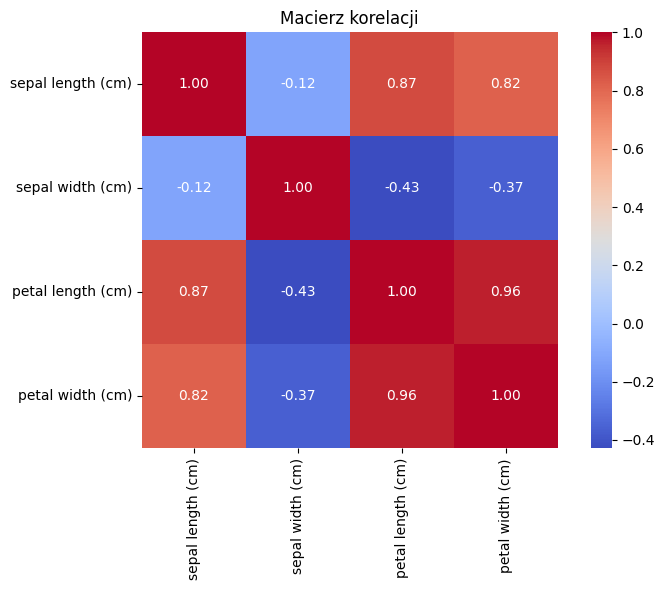

In [33]:
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd

iris = load_iris() # wczytywanie zbioru danych irisow
df = pd.DataFrame(iris.data, columns=iris.feature_names) # tworzenie ramki danych

corr_matrix = df.corr() # obliczanie korelacji

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Macierz korelacji")
plt.tight_layout()
plt.show()